In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [4]:
data_folder = '/content/mnt/MyDrive/data/인구소멸위기지역'

In [5]:
map_raw = pd.read_excel(f'{data_folder}/draw_korea_raw(2021).xlsx')
map = pd.DataFrame(map_raw.stack()).reset_index(inplace=False).rename(columns={0:'ID'})
map.shape

(250, 3)

In [6]:
map.head(100).tail(10)

,level_0,level_1,ID
90,9,9,용인 처인
91,9,10,안동
92,9,11,영양
93,10,0,인천 옹진
94,10,1,인천 연수
95,10,2,인천 남동
96,10,3,화성
97,10,4,오산
98,10,5,수원 팔달
99,10,6,수원 장안


In [7]:
pd.Series([len(x) for x in map.ID]).value_counts()

2    138
5     98
6     10
3      4
dtype: int64

In [8]:
two_id = map.ID[map.ID.str.len()==2].values.tolist()
print(two_id)

['철원', '화천', '양구', '양주', '연천', '포천', '인제', '춘천', '속초', '파주', '홍천', '횡성', '양양', '가평', '구리', '하남', '정선', '강릉', '김포', '광명', '양평', '태백', '동해', '부천', '여주', '원주', '삼척', '이천', '평창', '울진', '시흥', '광주', '영월', '영덕', '과천', '문경', '봉화', '울릉', '군포', '의왕', '안동', '영양', '화성', '오산', '제천', '예천', '영주', '구미', '청송', '태안', '아산', '평택', '음성', '안성', '단양', '상주', '김천', '군위', '의성', '당진', '홍성', '예산', '공주', '진천', '충주', '괴산', '칠곡', '영천', '경산', '경주', '서산', '보령', '청양', '세종', '증평', '보은', '고령', '청도', '성주', '부여', '논산', '계룡', '서천', '금산', '옥천', '영동', '군산', '익산', '무주', '거창', '합천', '부안', '김제', '완주', '장수', '함양', '창녕', '밀양', '고창', '정읍', '진안', '남원', '진주', '의령', '영광', '장성', '임실', '산청', '함안', '양산', '함평', '담양', '순창', '구례', '하동', '김해', '신안', '무안', '곡성', '화순', '광양', '사천', '통영', '목포', '나주', '순천', '고흥', '남해', '거제', '해남', '영암', '여수', '진도', '강진', '장흥', '보성', '완도', '제주']


In [9]:
'증평' in two_id

True

In [10]:
three_id = map.ID[map.ID.str.len()==3].values.tolist()
print(three_id)

['동두천', '의정부', '남양주', '서귀포']


In [11]:
five_id = map.ID[map.ID.str.len()==5].apply(lambda x : x.split()[0]).unique().tolist()
five_id_metro = ['서울','인천','대구','부산','광주']
five_id_city = [x for x in five_id if x not in five_id_metro]

print(five_id)
print(five_id_metro)
print(five_id_city)

['서울', '고양', '인천', '안양', '성남', '안산', '용인', '수원', '포항', '천안', '청주', '대전', '울산', '대구', '부산', '전주', '창원', '광주']
['서울', '인천', '대구', '부산', '광주']
['고양', '안양', '성남', '안산', '용인', '수원', '포항', '천안', '청주', '대전', '울산', '전주', '창원']


In [12]:
six_id = map.ID[map.ID.str.len()==6].values.tolist()
print(six_id)

['고성(강원)', '고양 일산동', '고양 일산서', '서울 서대문', '서울 동대문', '서울 영등포', '인천 미추홀', '부산 부산진', '부산 해운대', '고성(경남)']


In [14]:
addr = '경기도 고양시 일산동구 중앙로 1059'
pattern = '[ㄱ-ㅎㅏ-ㅣ가-힣 ]+'
if re.search(r'경기[ㄱ-ㅎㅏ-ㅣ가-힣 ]+고양[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', addr):
    print(' '.join([addr.split()[1][:-1], addr.split()[2][:-1]]))

고양 일산동


In [15]:
coffee_folder = '/content/mnt/MyDrive/results/CoffeeIndex'

In [28]:
sb = pd.read_csv(f'{coffee_folder}/스타벅스.csv')
sb.drop('도로명', axis=1, inplace=True)
sb['ID'] = ''
sb['브랜드'] = '스타박스'
sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호명     1549 non-null   object
 1   지점명     1392 non-null   object
 2   시도명     1549 non-null   object
 3   시군구명    1549 non-null   object
 4   도로명주소   1549 non-null   object
 5   ID      1549 non-null   object
 6   브랜드     1549 non-null   object
dtypes: object(7)
memory usage: 84.8+ KB


In [29]:
cb = pd.read_csv(f'{coffee_folder}/커피빈.csv')
cb.drop('도로명', axis=1, inplace=True)
cb['ID'] = ''
cb['브랜드'] = '커피빈'
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호명     293 non-null    object
 1   지점명     237 non-null    object
 2   시도명     293 non-null    object
 3   시군구명    293 non-null    object
 4   도로명주소   293 non-null    object
 5   ID      293 non-null    object
 6   브랜드     293 non-null    object
dtypes: object(7)
memory usage: 16.1+ KB


In [30]:
ed = pd.read_csv(f'{coffee_folder}/이디야.csv')
ed.drop('도로명', axis=1, inplace=True)
ed['ID'] = ''
ed['브랜드'] = '이디야'
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호명     2120 non-null   object
 1   지점명     1888 non-null   object
 2   시도명     2120 non-null   object
 3   시군구명    2120 non-null   object
 4   도로명주소   2120 non-null   object
 5   ID      2120 non-null   object
 6   브랜드     2120 non-null   object
dtypes: object(7)
memory usage: 116.1+ KB


In [31]:
bd = pd.read_csv(f'{coffee_folder}/빽다방.csv')
bd.drop('도로명', axis=1, inplace=True)
bd['ID'] = ''
bd['브랜드'] = '빽다방'
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호명     609 non-null    object
 1   지점명     569 non-null    object
 2   시도명     609 non-null    object
 3   시군구명    609 non-null    object
 4   도로명주소   609 non-null    object
 5   ID      609 non-null    object
 6   브랜드     609 non-null    object
dtypes: object(7)
memory usage: 33.4+ KB


In [32]:
for shop in [sb, cb, ed, bd]:
    for idx, row in shop.iterrows():
        #print(idx, row['도로명주소'])

        if re.search(r'강원[ㄱ-ㅎㅏ-ㅣ가-힣 ]+고성[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['도로명주소']):
            row['ID'] = '고성(강원)'

        elif re.search(r'세종[ㄱ-ㅎㅏ-ㅣ가-힣 ]*시[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['도로명주소']):
            row['ID'] = '세종'

        elif re.search(r'군위[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['시군구명']):
            row['ID'] = '군위'

        elif re.search(r'보성[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['시군구명']):
            row['ID'] = '보성'

        elif re.search(r'신안[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['시군구명']):
            row['ID'] = '신안'

        elif re.search(r'보성[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['시군구명']):
            row['ID'] = '봉화'

        elif re.search(r'울릉[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['시군구명']):
            row['ID'] = '울릉'

        elif re.search(r'의령[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['시군구명']):
            row['ID'] = '의령'

        elif re.search(r'진도[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['시군구명']):
            row['ID'] = '진도'

        elif re.search(r'함평[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['시군구명']):
            row['ID'] = '함평'

        elif re.search(r'의성[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['시군구명']):
            row['ID'] = '의성'

        elif re.search(r'경남[ㄱ-ㅎㅏ-ㅣ가-힣 ]+고성[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['도로명주소']):
            row['ID'] = '고성(경남)'

        elif re.search(r'경기[ㄱ-ㅎㅏ-ㅣ가-힣 ]+고양[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['도로명주소']):
            row['ID'] = ' '.join([row['도로명주소'].split()[1][:-1], row['도로명주소'].split()[2][:-1]])   

        elif re.search(r'서울[ㄱ-ㅎㅏ-ㅣ가-힣 ]+서대문[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['도로명주소']):
            row['ID'] = ' '.join([row['도로명주소'].split()[1][:-1], row['도로명주소'].split()[2][:-1]])

        elif re.search(r'서울[ㄱ-ㅎㅏ-ㅣ가-힣 ]+동대문[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['도로명주소']):
            row['ID'] = ' '.join([row['도로명주소'].split()[1][:-1], row['도로명주소'].split()[2][:-1]])

        elif re.search(r'서울[ㄱ-ㅎㅏ-ㅣ가-힣 ]+영등포[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['도로명주소']):
            row['ID'] = ' '.join([row['도로명주소'].split()[1][:-1], row['도로명주소'].split()[2][:-1]]) 

        elif re.search(r'인천[ㄱ-ㅎㅏ-ㅣ가-힣 ]+미추홀[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['도로명주소']):
            row['ID'] = ' '.join([row['도로명주소'].split()[1][:-1], row['도로명주소'].split()[2][:-1]]) 

        elif re.search(r'부산[ㄱ-ㅎㅏ-ㅣ가-힣 ]+부산진[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['도로명주소']):
            row['ID'] = ' '.join([row['도로명주소'].split()[1][:-1], row['도로명주소'].split()[2][:-1]])

        elif re.search(r'부산[ㄱ-ㅎㅏ-ㅣ가-힣 ]+해운대[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', row['도로명주소']):
            row['ID'] = ' '.join([row['도로명주소'].split()[1][:-1], row['도로명주소'].split()[2][:-1]])

        elif row['시군구명'].split()[0][:-1] in two_id:
            row['ID'] = row['시군구명'].split()[0][:-1]

        elif row['시군구명'].split()[0][:-1] in three_id:
            row['ID'] = row['시군구명'].split()[0][:-1]

        elif row['시군구명'].split()[0][:-1] in five_id_city:
            row['ID'] = ' '.join([row['도로명주소'].split()[1][:-1], row['도로명주소'].split()[2][:-1]])

        elif row['시도명'].split()[:2] in five_id_metro:
            row['ID'] = ' '.join([row['도로명주소'].split()[0][:-1], row['도로명주소'].split()[1][:-1]])

        else:
            row['ID'] = ' '.join([row['도로명주소'].split()[0][:2], row['도로명주소'].split()[1][:2]])

In [33]:
for shop in [sb, cb, ed, bd]:
    for idx in shop.index:
        if shop.loc[idx, 'ID'] == '경상 고성':
            shop.loc[idx, 'ID'] = '고성(경남)'
        elif re.search(r'영등포[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '서울 영등포'
        elif re.search(r'동대문[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '서울 동대문'
        elif re.search(r'서대문[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '서울 서대문'
        elif re.search(r'미추홀[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '인천 미추홀'
        elif re.search(r'부산진[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '부산 부산진'
        elif re.search(r'인천 남[ㄱ-ㅎㅏ-ㅣ가-힣 ]+', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '인천 남동'
        elif re.search(r'창원 마산합포[ㄱ-ㅎㅏ-ㅣ가-힣 ]*', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '창원 합포'
        elif re.search(r'창원 마산회원[ㄱ-ㅎㅏ-ㅣ가-힣 ]*', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '창원 회원'
        elif re.search(r'포항 남[ㄱ-ㅎㅏ-ㅣ가-힣 ]*', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '포항 남구'
        elif re.search(r'포항 북[ㄱ-ㅎㅏ-ㅣ가-힣 ]*', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '포항 북구'
        elif re.search(r'해운대[ㄱ-ㅎㅏ-ㅣ가-힣 ]*', shop.loc[idx, 'ID']):
            shop.loc[idx, 'ID'] = '부산 해운대'

In [34]:
sb.head()

,상호명,지점명,시도명,시군구명,도로명주소,ID,브랜드
0,스타벅스강릉안목항점,강릉안목항점,강원도,강릉시,강원도 강릉시 창해로14번길 40,강릉,스타박스
1,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,고성(강원),스타박스
2,스타벅스춘천후평DT점,춘천후평DT점,강원도,춘천시,강원도 춘천시 후석로 318,춘천,스타박스
3,스타벅스,춘천명동점,강원도,춘천시,강원도 춘천시 중앙로 55,춘천,스타박스
4,스타벅스설악워터피아점,설악워터피아점,강원도,속초시,강원도 속초시 미시령로2983번길 88,속초,스타박스


In [35]:
coffee_df = pd.concat([sb, cb, ed, bd]).reset_index(drop=True)
coffee_df['개수'] = 1

In [36]:
coffee_df.tail()

,상호명,지점명,시도명,시군구명,도로명주소,ID,브랜드,개수
4566,빽다방,충북대중문점,충청북도,청주시 서원구,충청북도 청주시 서원구 내수동로 101,청주 서원,빽다방,1
4567,빽다방,서원대점,충청북도,청주시 서원구,충청북도 청주시 서원구 서원남로 50-5,청주 서원,빽다방,1
4568,빽다방,진천점,충청북도,진천군,충청북도 진천군 진천읍 상산로 73,진천,빽다방,1
4569,빽다방,청주강서점,충청북도,청주시 흥덕구,충청북도 청주시 흥덕구 강서로 115,청주 흥덕,빽다방,1
4570,빽다방,NaN,충청북도,증평군,충청북도 증평군 증평읍 중앙로 197,증평,빽다방,1


In [37]:
shops_by_id_brand = pd.pivot_table(index='ID', columns='브랜드', values='개수', data=coffee_df, aggfunc='sum').fillna(0).astype(int).reset_index()
shops_by_id_brand['cf_index'] = (shops_by_id_brand['스타박스'] + shops_by_id_brand['커피빈']) / (shops_by_id_brand['이디야'] + shops_by_id_brand['빽다방'])
shops_by_id_brand.round(3)

브랜드,ID,빽다방,스타박스,이디야,커피빈,cf_index
0,가평,0,2,9,0,0.222
1,강릉,2,5,15,0,0.294
2,강진,0,0,1,0,0.000
3,거제,0,6,9,0,0.667
4,거창,1,0,1,0,0.000
...,...,...,...,...,...,...
236,홍천,1,2,3,0,0.500
237,화성,10,16,28,5,0.553
238,화순,1,0,1,0,0.000
239,화천,1,0,1,0,0.000


In [40]:
shops_by_id_brand[['스타박스','커피빈','이디야','빽다방']].sum(axis=0)

브랜드
스타박스    1549
커피빈      293
이디야     2120
빽다방      609
dtype: int64

In [47]:
map_raw = pd.read_excel(f'{data_folder}/draw_korea_raw(2021).xlsx')

In [48]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
print(map.shape)
map.head()

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [49]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [50]:
!cp $data_folder/draw_map.py .

In [51]:
!ls -l

total 20
-rw------- 1 root root 5269 Sep  7 04:13 draw_map.py
drwx------ 6 root root 4096 Sep  7 04:00 mnt
drwxr-xr-x 2 root root 4096 Sep  7 04:10 __pycache__
drwxr-xr-x 1 root root 4096 Sep  1 19:26 sample_data


In [52]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

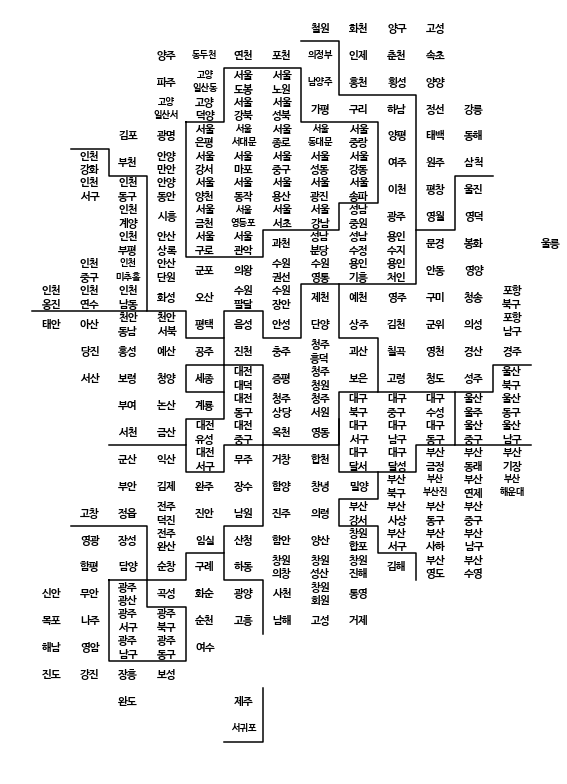

In [53]:
plt.figure(figsize=(8,11))

for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [54]:
pop = pd.merge(shops_by_id_brand, map, how='left', on='ID')
print(pop.shape)
pop.head()

(241, 8)


,ID,빽다방,스타박스,이디야,커피빈,cf_index,y,x
0,가평,0,2,9,0,0.222222,3,7
1,강릉,2,5,15,0,0.294118,3,11
2,강진,0,0,1,0,0.000000,24,1
3,거제,0,6,9,0,0.666667,22,8
4,거창,1,0,1,0,0.000000,16,6


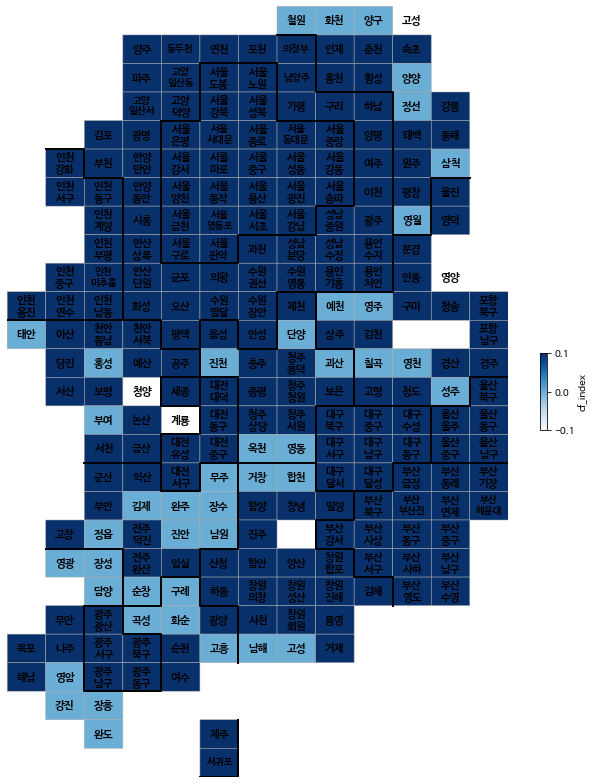

In [55]:
drawKorea('cf_index', pop, 'Blues')

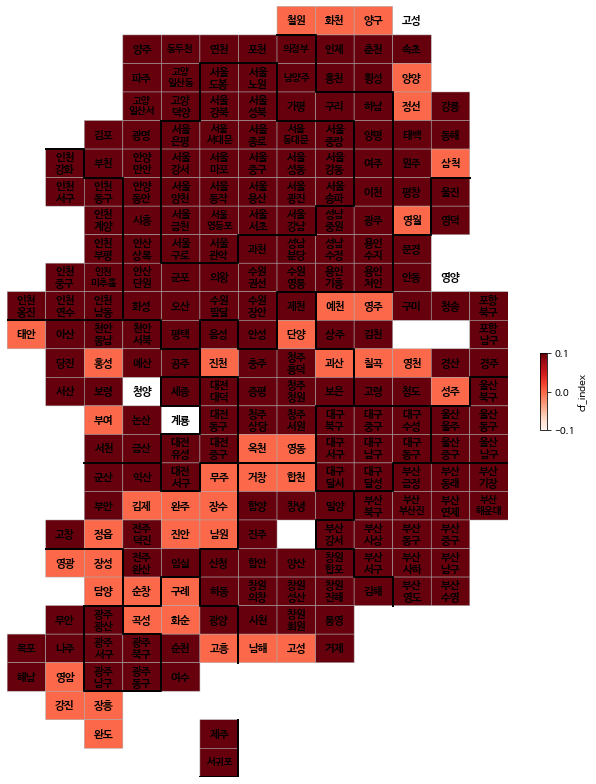

In [56]:
drawKorea('cf_index', pop, 'Reds')

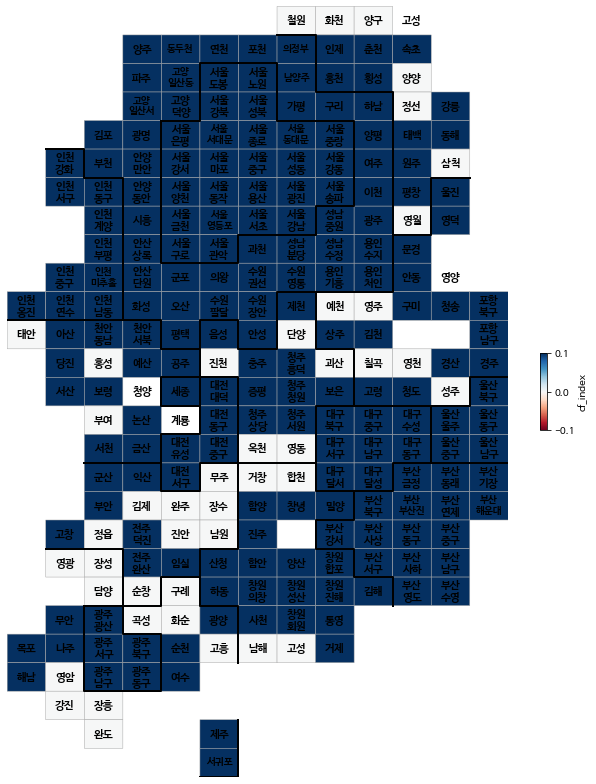

In [60]:
drawKorea('cf_index', pop, 'RdBu')

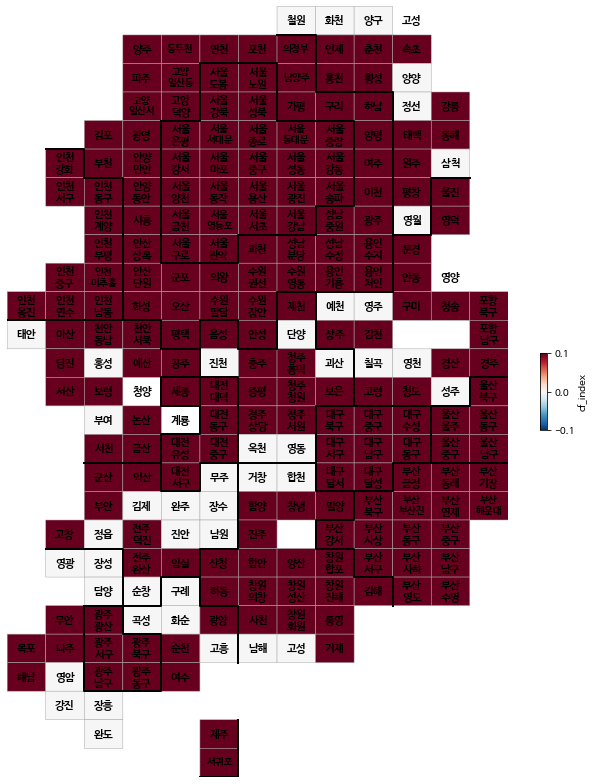

In [61]:
drawKorea('cf_index', pop, 'RdBu_r')